# Imporing Library

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import warnings: This line imports the warnings module, which is a standard Python module used to handle warnings that can be generated during the execution of a program.

warnings.filterwarnings("ignore"): This line sets up a filter to ignore (suppress) all warning messages generated by Python during the execution of your code.

In [ ]:
import os

# Get the number of CPU cores
num_cores = os.cpu_count()

print(f"Number of CPU cores: {num_cores}")

Number of CPU cores: 2


In [ ]:
import sys
if 'google.colab' in sys.modules:
  !pip install -q dtreeviz

import sys: This imports the Python sys module, which provides access to various system-specific parameters and functions.

!pip install -q dtreeviz: If the code is running in Google Colab, it uses the ! syntax to run a shell command inside Colab's environment. In this case, it's using pip to install the dtreeviz package with the -q flag, which makes the installation process quiet (no verbose output).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, classification_report, f1_score
%matplotlib inline

# Dataset Loading

In [ ]:
#load the data set
titanic = pd.read_csv('tested.csv')

In [ ]:
# Explore the dataset
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
titanic.shape

(418, 12)

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


# Data Preprocessing




In [ ]:
backup = titanic.copy()

In [ ]:
titanic.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,False,True,False,False,False,False,True,False


<Axes: >

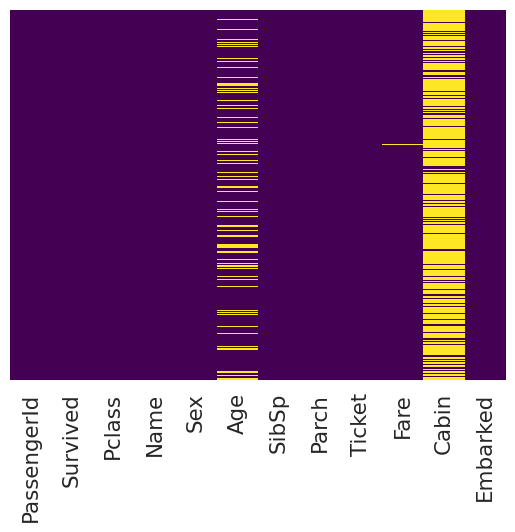

In [ ]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Roughly 20% - 30% Age data is missing. The propotion of Age missing is likely small enough for resonable replacement with some form of imputation. Looking at the cabin column, it looks missing too much of that data to do something useful with at a basic level. We will drop the cabin columns.

In [ ]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Drop the Cabin columns

In [ ]:
titanic = titanic.drop(columns = 'Cabin')

Handle missing values

In [ ]:
# Handle missing values
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)
titanic['Fare'].fillna(titanic['Fare'].mode()[0], inplace=True)

Drop the irrelevant columns, like 'Name', ''PassengerId', 'Ticket'.

In [ ]:
titanic.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    object 
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      418 non-null    float64
 7   Embarked  418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


# Data Visualization



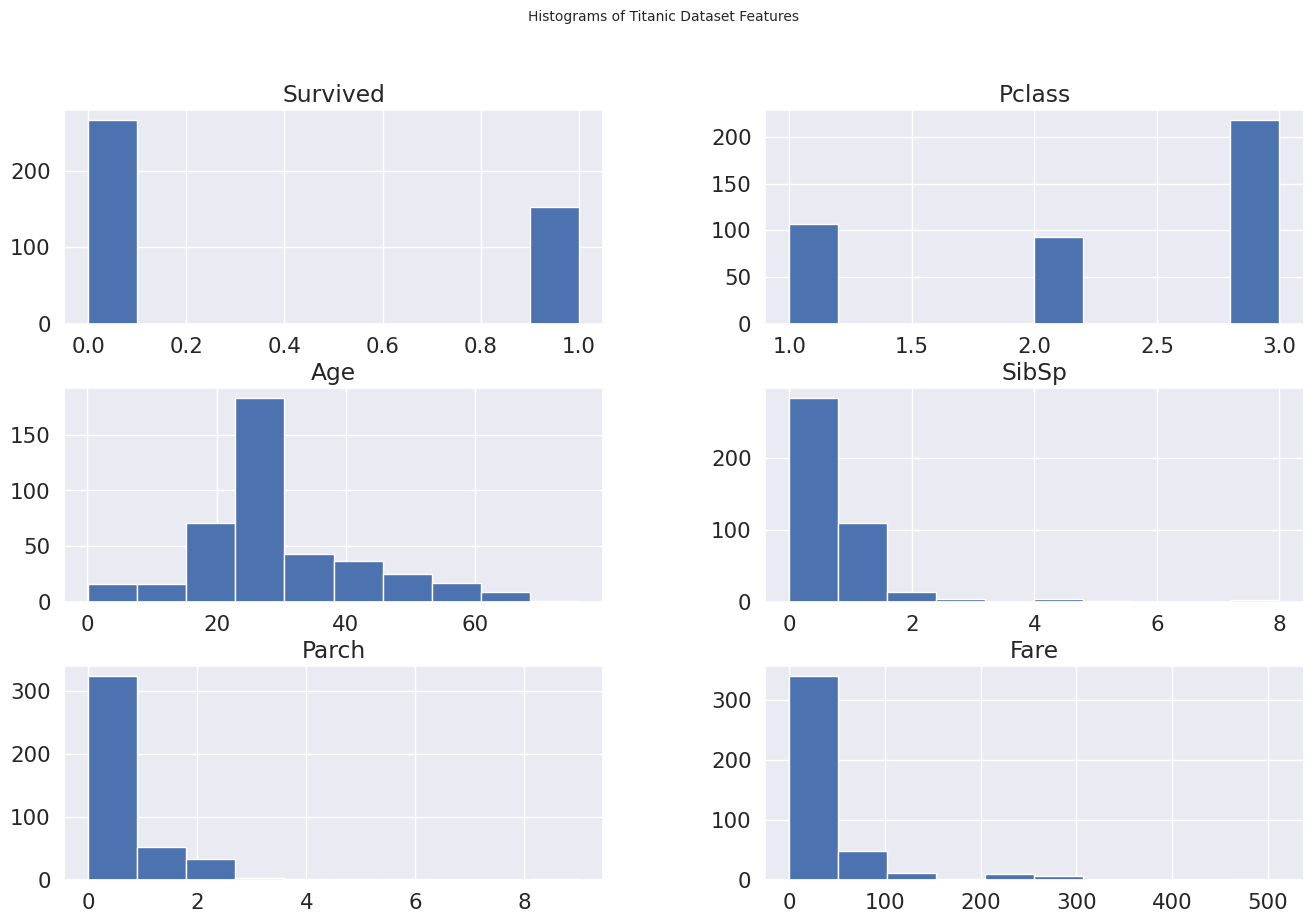

In [ ]:
titanic.hist(figsize=(16, 10))
plt.suptitle("Histograms of Titanic Dataset Features", fontsize=10)
plt.show()

<Axes: xlabel='Survived', ylabel='count'>

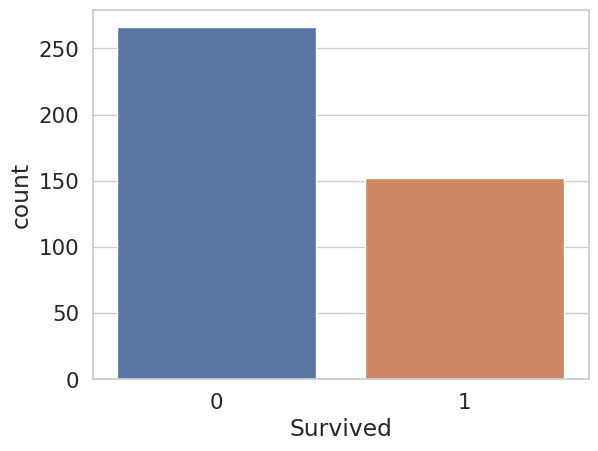

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=titanic)

Here we use counter plot to visualize how many people were survived and how many were not survived
Here, 0 denoted not survived and 1 denoted survived. So, we can see that around 250+ were not survived and around 150 were survived.  

<Axes: xlabel='Survived', ylabel='count'>

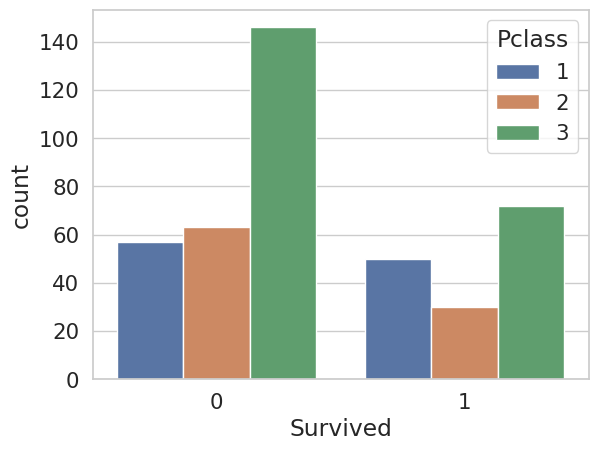

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=titanic)

Here, We can see that there are 3 passenger class 1,2 and 3
So, we can visualized that from every passenger class how many were survived and not survived.

<Axes: xlabel='Survived', ylabel='count'>

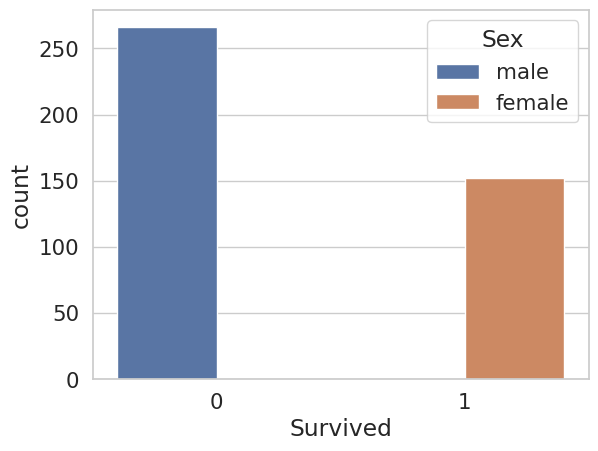

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=titanic)

The plot show that between male and female who are survived and who are not survived.

<Axes: xlabel='SibSp', ylabel='count'>

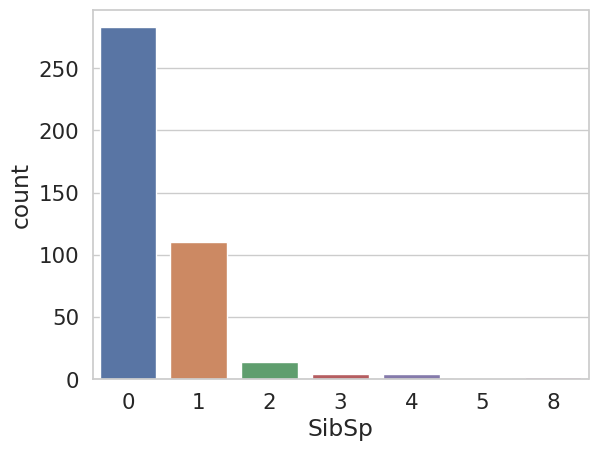

In [ ]:
sns.countplot(x='SibSp',data=titanic)

Here we found that how many passengers had spouse or siblings.

<Axes: xlabel='Age'>

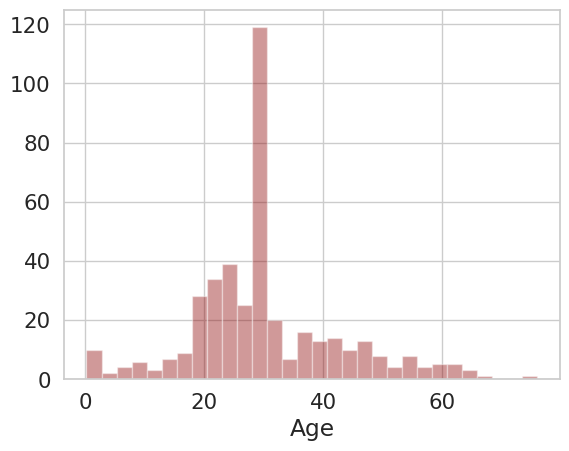

In [ ]:
sns.distplot(titanic['Age'].dropna(),kde=False,color='darkred',bins=30)

<Axes: >

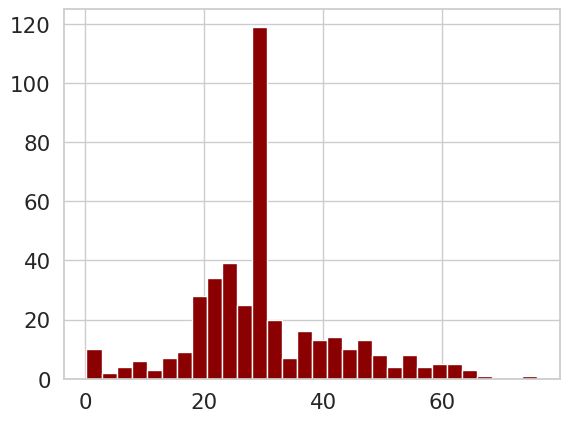

In [ ]:
titanic['Age'].hist(bins=30,color='darkred')

<Axes: xlabel='Parch', ylabel='count'>

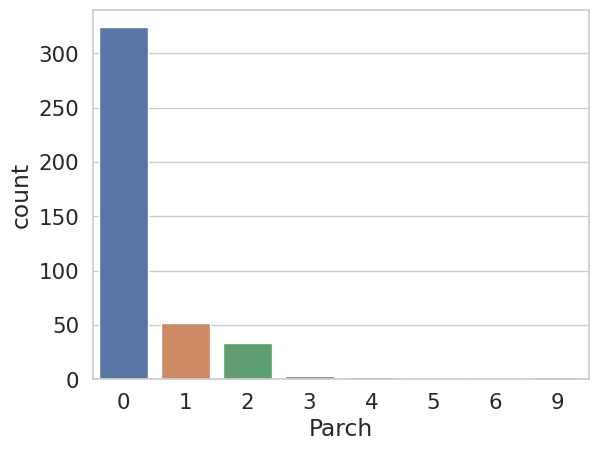

In [ ]:
sns.countplot(x='Parch',data=titanic)

<Axes: xlabel='Embarked', ylabel='count'>

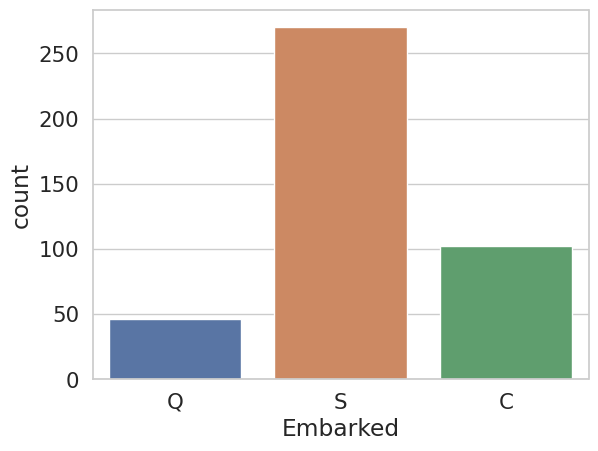

In [ ]:
sns.countplot(x='Embarked',data=titanic)

# Split the Data into Training and Testing Sets

Convert categorical variables to dummy/indicator variables

In [ ]:
titanic = pd.get_dummies(titanic, columns=['Sex', 'Embarked'], drop_first=True)

Define the target variable

In [ ]:
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']

Split the dataset into training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

Standardize features

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Linear Regression Model

Create and train the linear regression model

In [ ]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

Make predictions on the test data

In [ ]:
y_pred_linear = linear_model.predict(X_test)

Convert predicted values to binary (0 or 1)


In [ ]:
y_pred_linear = np.round(y_pred_linear).astype(int)

Evaluate the linear regression model (using accuracy for binary classification)

In [ ]:
accuracy_linear = accuracy_score(y_test, y_pred_linear)*100
f1_linear = f1_score(y_test, y_pred_linear)
print("Linear Regression Model Accuracy:", accuracy_linear)
print("Linear Regression F1 Score:", f1_linear)

Linear Regression Model Accuracy: 100.0
Linear Regression F1 Score: 1.0


Calculate and plot the confusion matrix for the linear regression model

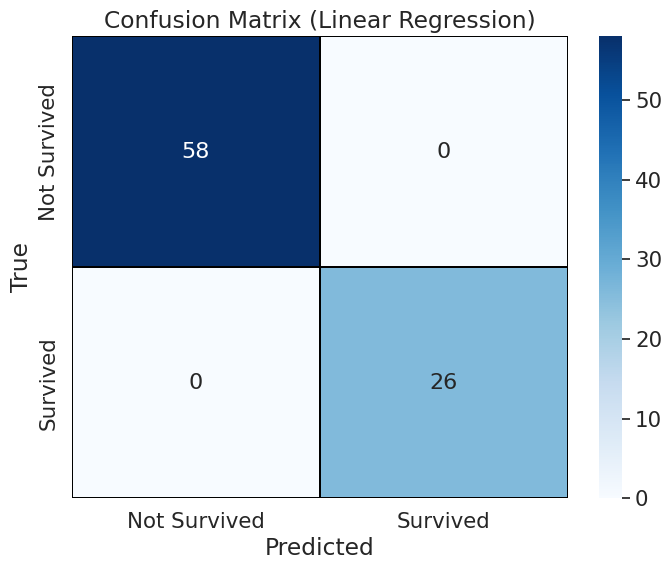

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix_linear = confusion_matrix(y_test, y_pred_linear)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)
sns.heatmap(confusion_matrix_linear, annot=True, fmt='g', cmap='Blues', cbar=True,
            annot_kws={'size': 16}, linewidths=0.2, linecolor='black',
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Linear Regression)')
plt.show()

# Logistic Regression Model

Create and train the logistic regression model

In [ ]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

Make predictions on the test data


In [ ]:
y_pred_logistic = logistic_model.predict(X_test)

Evaluate the logistic regression model

In [ ]:
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)*100
f1_logistic = f1_score(y_test, y_pred_logistic)
print("Logistic Regression Accuracy:", accuracy_logistic)
print("Logistic Regression F1 Score:", f1_logistic)

Logistic Regression Accuracy: 100.0
Logistic Regression F1 Score: 1.0


Calculate and plot the confusion matrix for the logistic regression model

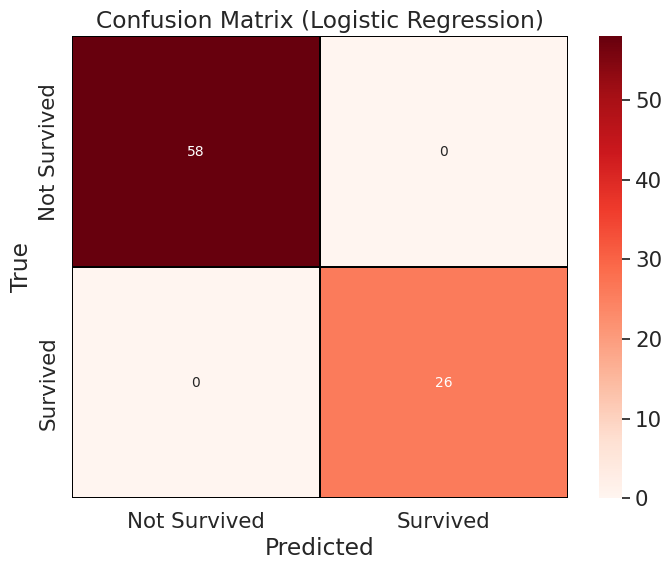

In [ ]:
confusion_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)
sns.heatmap(confusion_matrix_logistic, annot=True, fmt='g', cmap='Reds', cbar=True,
            annot_kws={'size': 10}, linewidths=0.2, linecolor='black',
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()

# Use of Confusion matrix
Confusion matrix is a fundamental tool in the field of machine learning and statistics used to assess the performance of a classification model. It provides a clear and concise summary of the model's predictions compared to the actual ground truth values in a classification problem.

The confusion matrix is typically a square matrix that organizes the model's predictions into four categories:

1. True Positives (TP): These are cases where the model correctly predicted a positive class (e.g., correctly identifying a disease in a medical diagnosis).

2. True Negatives (TN): These are cases where the model correctly predicted a negative class (e.g., correctly identifying a non-disease in a medical diagnosis).

3. False Positives (FP): These are cases where the model incorrectly predicted a positive class when the true class is negative (e.g., falsely diagnosing a healthy person as having a disease).

4. False Negatives (FN): These are cases where the model incorrectly predicted a negative class when the true class is positive (e.g., failing to diagnose a person with a disease when they actually have it).

From these four values, various performance metrics can be derived to evaluate the model's accuracy, precision, recall, F1-score, and more. These metrics help stakeholders understand how well the model is performing in terms of correctly classifying instances and avoiding false predictions.

Confusion matrices are particularly useful for assessing the strengths and weaknesses of a model and for making informed decisions about model improvement, such as adjusting thresholds or fine-tuning the model's parameters. They provide a clear and intuitive way to visualize the model's performance in classification tasks, making them an essential tool in machine learning evaluation and diagnostics.